## Install and load packages

In [20]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
%matplotlib inline
from pmlb import fetch_data
from statistics import mean

In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

print("Path to dataset files:", path)

/Users/sofiegoethals/Library/CloudStorage/OneDrive-UniversiteitAntwerpen/Documenten/Research/Project Oxford/unfairness_fairml/Unfair_ML/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 652k/652k [00:00<00:00, 17.9MB/s]

Extracting files...
Path to dataset files: /Users/sofiegoethals/.cache/kagglehub/datasets/wenruliu/adult-income-dataset/versions/2


In [23]:
import pandas as pd
import os

# List all files in the path to find the CSV
files = os.listdir(path)
print("Files in dataset:", files)

# Assuming the file is 'adult.csv' or similar, adjust the file name if needed
csv_file = os.path.join(path, 'adult.csv')  # Replace 'adult.csv' with the actual file name if different

# Load the CSV into a pandas DataFrame
adult = pd.read_csv(csv_file)

Files in dataset: ['adult.csv']


In [25]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [37]:
from pmlb import fetch_data
import pandas as pd
import numpy as np
#adult =  fetch_data('adult')
X=adult.drop(columns=[ 'income','fnlwgt','native-country', 'marital-status', 'relationship'])
# Convert categorical columns to 'category' dtype
categorical_columns = ['workclass', 'education', 'occupation', 'race', 'gender']
for col in categorical_columns:
    X[col] = X[col].astype('category')
#y = adult.loc[:, 'target']
y=pd.Series([1 if adult.loc[i,'income']=='>50K' else 0 for i in range(len(X))])
sens_var='gender'
sensitive_value='Female'
y.value_counts(normalize=True)
good_outcome=1

In [40]:
%run "../functions/clean_functions.py"

In [41]:
model='xgb'
test_results, val_results=run_constraints_xgb(X,y, sens_var, sensitive_value)
test_metrics=run_all_results_clean(test_results, val_results, good_outcome)

Run biased model
The AUC of the biased model (validation set) is: 0.8960980193651542
The AUC of the biased model (test set) is: 0.8964066187373302
The AUC of the biased model for the protected group (validation set) is: 0.8801086926515134
The AUC of the biased model for the privileged group (validation set) is: 0.883764143173589
The AUC of the biased model for the protected group (test set) is: 0.8708142286736786
The AUC of the biased model for the privileged group (test set) is: 0.8866387017306852
Calculate demographic parity


100%|██████████| 100/100 [00:43<00:00,  2.29it/s]


Calculate equality of opportunity


100%|██████████| 100/100 [37:05<00:00, 22.25s/it]


Calculate accuracy


100%|██████████| 100/100 [00:00<00:00, 912.08it/s]


Calculate precision


100%|██████████| 100/100 [00:00<00:00, 261.68it/s]


Calculate recall


100%|██████████| 100/100 [00:00<00:00, 447.02it/s]


In [42]:
print('Percentage of people in the protected group {}'.format(test_results.protected.mean()))
print('Percentage of people with the target value {}'.format(test_results.target.mean()))
print('The base rate disparity is {}'.format(test_results[test_results.protected==False].target.value_counts(normalize=True)[good_outcome] - test_results[test_results.protected==True].target.value_counts(normalize=True)[good_outcome]))


Percentage of people in the protected group 0.3315043812955532
Percentage of people with the target value 0.23929244124150356
The base rate disparity is 0.1946201505007411


In [60]:
# cost
print('precision')
print('The average cost of fairness (DP) is {}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_dp'])])))
print('The average cost of fairness (EO) is {}'.format(mean([a - b for a, b in zip(test_metrics['prec_unfair'], test_metrics['prec_eo'])])))
print('recall')
print('The average cost of fairness (DP) is {}'.format(mean([a - b for a, b in zip(test_metrics['rec_unfair'], test_metrics['rec_dp'])])))
print('The average cost of fairness (EO) is {}'.format(mean([a - b for a, b in zip(test_metrics['rec_unfair'], test_metrics['rec_eo'])])))
print('accuracy')
print('The average cost of fairness (DP) is {}'.format(mean([a - b for a, b in zip(test_metrics['acc_unfair'], test_metrics['acc_dp'])])))
print('The average cost of fairness (EO) is {}'.format(mean([a - b for a, b in zip(test_metrics['acc_unfair'], test_metrics['acc_eo'])])))


precision
The average cost of fairness (DP) is 0.024581000964946902
The average cost of fairness (EO) is 0.00873278468677759
recall
The average cost of fairness (DP) is 0.02286789869952087
The average cost of fairness (EO) is 0.010232717316906226
accuracy
The average cost of fairness (DP) is 0.01094423061174351
The average cost of fairness (EO) is 0.004895585947096883


In [61]:
# save results
import pickle

with open(f'Results/Adult_test_results.pkl', 'wb') as f:
    pickle.dump(test_results, f)
with open(f'Results/Adult_test_metrics.pkl', 'wb') as f:
    pickle.dump(test_metrics, f)

## Read results and visualize

In [ ]:
# read results
import pickle
test_results = pd.read_pickle('Results/Adult_test_results.pkl')
test_metrics = pd.read_pickle('Results/Adult_test_metrics.pkl')

In [58]:
%run "../functions/visualisations.py"

/Users/sofiegoethals/Library/CloudStorage/OneDrive-UniversiteitAntwerpen/Documenten/Research/Project Oxford/unfairness_fairml/Unfair_ML/functions/visualisations.py:110: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('Selection rate (in %)', fontsize=15)
/Users/sofiegoethals/Library/CloudStorage/OneDrive-UniversiteitAntwerpen/Documenten/Research/Project Oxford/unfairness_fairml/Unfair_ML/functions/visualisations.py:150: SyntaxWarning: invalid escape sequence '\D'
  min_capacity = min(C_list)


<Figure size 640x480 with 0 Axes>

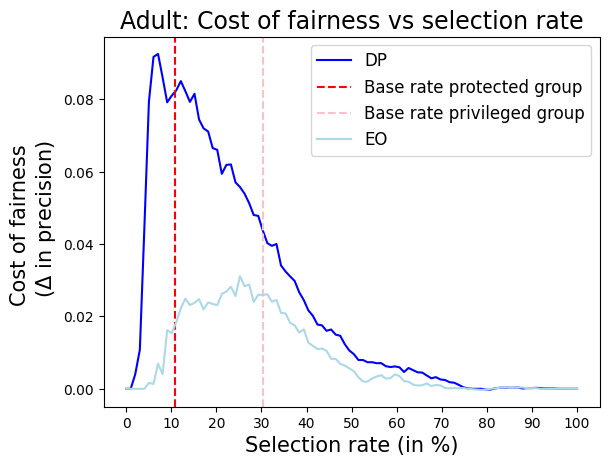

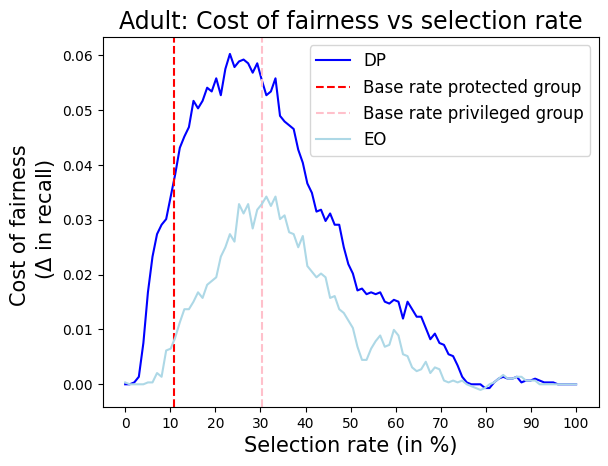

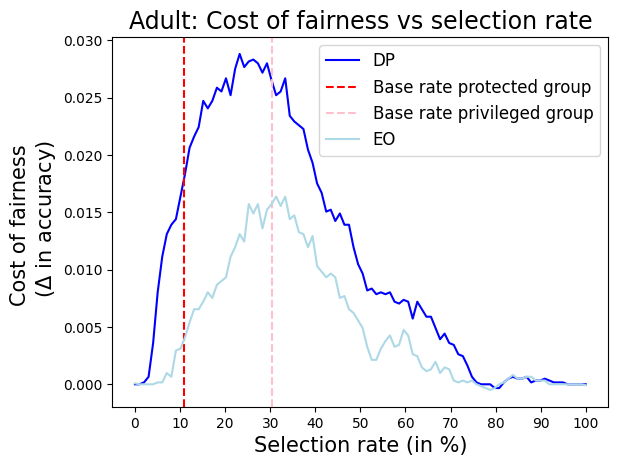

In [45]:
C_list=[i for i in np.linspace(start=1, stop=len(test_results), num=100, dtype=int)]
dataset='Adult'
plot_cost(test_metrics['prec_unfair'],test_metrics['prec_dp'],C_list, test_results, 'precision', 'DP', dataset, test_metrics['prec_eo'], 'EO')  
plot_cost(test_metrics['rec_unfair'],test_metrics['rec_dp'],C_list, test_results, 'recall', 'DP', dataset, test_metrics['rec_eo'], 'EO') 
plot_cost(test_metrics['acc_unfair'],test_metrics['acc_dp'],C_list, test_results, 'accuracy', 'DP', dataset, test_metrics['acc_eo'], 'EO')  

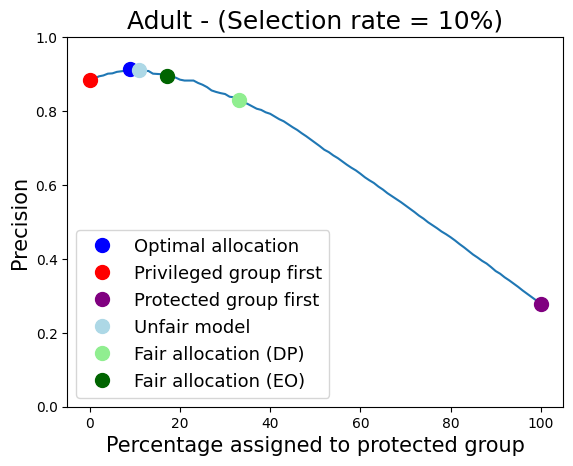

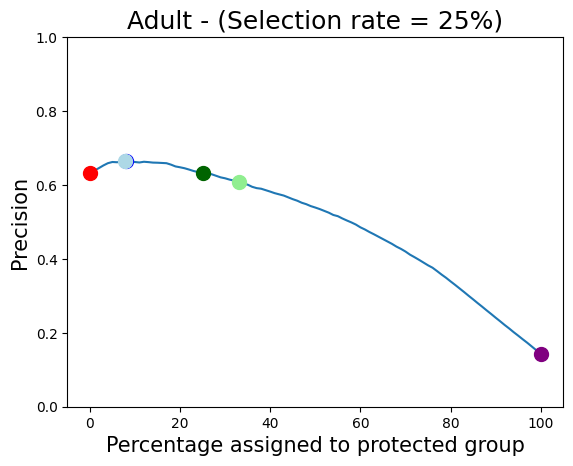

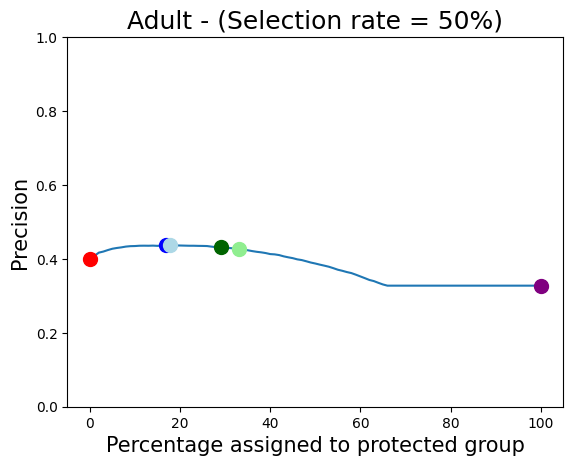

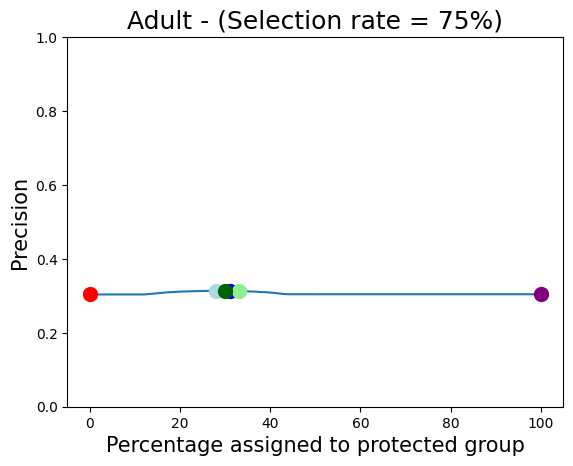

In [59]:
dataset='Adult'
ymin=0
ymax=1
plot_allocation_by_resourcelevel(test_metrics, test_results, C_list,  10,dataset,ymin, ymax, legend=True)
plot_allocation_by_resourcelevel(test_metrics, test_results, C_list,  25,dataset, ymin, ymax)
plot_allocation_by_resourcelevel(test_metrics, test_results, C_list,  50,dataset,ymin, ymax)
plot_allocation_by_resourcelevel(test_metrics, test_results, C_list,  75,dataset, ymin, ymax)